In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(ggplot2)
library(dplyr)
library(tidyr)
library(gridExtra)
library(phyloseq)
library(vegan)
library(scatterplot3d)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: grid
Loading required package: permute
Loading required package: lattice
This is vegan 2.3-0


In [62]:
%%R
otu.tbl.file1 = '/home/nick/notebook/SIPSim/dev/bac_genome1210/atomIncorp_taxaIncorp/0/10/1/OTU_n2_abs1e9_sub-norm_filt.physeq'
otu.tbl.file2 = '/home/nick/notebook/SIPSim/dev/bac_genome1210/atomIncorp_taxaIncorp/100/10/1/OTU_n2_abs1e9_sub-norm_filt.physeq'

physeq1 = readRDS(otu.tbl.file1)
physeq2 = readRDS(otu.tbl.file2)

In [63]:
%%R

ord1 = ordinate(physeq1, method='NMDS', distance='bray')
#p1 = plot_ordination(physeq1, ord1, justDF=T)

ord2 = ordinate(physeq2, method='NMDS', distance='bray')
#p2 = plot_ordination(physeq2, ord2, justDF=T)

ord1 %>% head %>% print
ord2 %>% head %>% print

Square root transformation
Wisconsin double standardization
Run 0 stress 0.0426932 
Run 1 stress 0.05602875 
Run 2 stress 0.04784602 
Run 3 stress 0.05883678 
Run 4 stress 0.0433072 
Run 5 stress 0.05247778 
Run 6 stress 0.05137602 
Run 7 stress 0.05137587 
Run 8 stress 0.04724677 
Run 9 stress 0.05248773 
Run 10 stress 0.05928348 
Run 11 stress 0.04784435 
Run 12 stress 0.04330974 
Run 13 stress 0.05637131 
Run 14 stress 0.04269324 
... procrustes: rmse 8.383037e-05  max resid 0.0001682424 
*** Solution reached
Square root transformation
Wisconsin double standardization
Run 0 stress 0.06218492 
Run 1 stress 0.06218456 
... New best solution
... procrustes: rmse 6.735155e-05  max resid 0.0001562711 
*** Solution reached
$nobj
[1] 21

$nfix
[1] 0

$ndim
[1] 2

$ndis
[1] 210

$ngrp
[1] 1

$diss
  [1] 0.06947495 0.08977843 0.09788153 0.10235470 0.11139204 0.11162789
  [7] 0.12183417 0.13108392 0.13510692 0.14783645 0.15584220 0.17077085
 [13] 0.17090523 0.17283236 0.17593318 0.17914761 0.

In [69]:
%%R
otu.tbl = physeq1 %>% otu_table %>% t
bc1 = vegdist(otu.tbl)

bc1.col = data.frame(t(combn(rownames(otu.tbl),2)), as.numeric(bc1))
colnames(bc1.col) = c('X1', 'X2', 'dist')

bc1.col$X1.lib = gsub('__.+', '', bc1.col$X1)
bc1.col$X2.lib = gsub('__.+', '', bc1.col$X2)

bc1.col$X1.F.start = gsub('.+__([0-9.]+)-.+', '\\1', bc1.col$X1)
bc1.col$X2.F.start = gsub('.+__([0-9.]+)-.+', '\\1', bc1.col$X2)

bc1.col$X1.F.end = gsub('.+-', '', bc1.col$X1)
bc1.col$X2.F.end = gsub('.+-', '', bc1.col$X2)

bc1.col %>% head

              X1             X2      dist X1.lib X2.lib X1.F.start X2.F.start
1 1__1.708-1.712 1__1.712-1.717 0.4413102      1      1      1.708      1.712
2 1__1.708-1.712 1__1.717-1.719 0.6651426      1      1      1.708      1.717
3 1__1.708-1.712 1__1.719-1.725 0.8261074      1      1      1.708      1.719
4 1__1.708-1.712 1__1.725-1.729 0.9495660      1      1      1.708      1.725
5 1__1.708-1.712 1__1.729-1.732 0.9771378      1      1      1.708      1.729
6 1__1.708-1.712 1__1.732-1.737 0.9829276      1      1      1.708      1.732
  X1.F.end X2.F.end
1    1.712    1.717
2    1.712    1.719
3    1.712    1.725
4    1.712    1.729
5    1.712    1.732
6    1.712    1.737


In [70]:
%%R
otu.tbl = physeq2 %>% otu_table %>% t
bc2 = vegdist(otu.tbl)

bc2.col = data.frame(t(combn(rownames(otu.tbl),2)), as.numeric(bc2))
colnames(bc2.col) = c('X1', 'X2', 'dist')


bc2.col$X1.lib = gsub('__.+', '', bc2.col$X1)
bc2.col$X2.lib = gsub('__.+', '', bc2.col$X2)

bc2.col$X1.F.start = gsub('.+__([0-9.]+)-.+', '\\1', bc2.col$X1)
bc2.col$X2.F.start = gsub('.+__([0-9.]+)-.+', '\\1', bc2.col$X2)

bc2.col$X1.F.end = gsub('.+-', '', bc2.col$X1)
bc2.col$X2.F.end = gsub('.+-', '', bc2.col$X2)

bc2.col %>% head

              X1             X2      dist X1.lib X2.lib X1.F.start X2.F.start
1 1__1.710-1.716 1__1.716-1.718 0.4458798      1      1      1.710      1.716
2 1__1.710-1.716 1__1.718-1.724 0.6242224      1      1      1.710      1.718
3 1__1.710-1.716 1__1.724-1.730 0.9026234      1      1      1.710      1.724
4 1__1.710-1.716 1__1.730-1.736 0.9741819      1      1      1.710      1.730
5 1__1.710-1.716 1__1.736-1.739 0.9870906      1      1      1.710      1.736
6 1__1.710-1.716 1__1.739-1.742 0.9833607      1      1      1.710      1.739
  X1.F.end X2.F.end
1    1.716    1.718
2    1.716    1.724
3    1.716    1.730
4    1.716    1.736
5    1.716    1.739
6    1.716    1.742


In [93]:
%%R
bc1.col$file = 1
bc2.col$file = 2

asNum = function (x){ as.numeric(as.character(x)) }

tbl.j = rbind(bc1.col, bc2.col)
tbl.j = tbl.j %>%
    filter(X1.lib != X2.lib) %>% 
    mutate(X1.F.start = asNum(X1.F.start),
           X2.F.start = asNum(X2.F.start),
           F.start.dist = abs(X1.F.start - X2.F.start),
           dist = asNum(dist),
           file = as.character(file))

#scatterplot3d(tbl.j$X1.F.start, tbl.j$X2.F.start, tbl.j$dist, color=tbl.j$file)

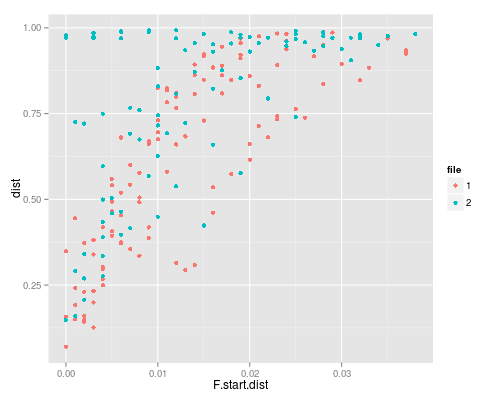

In [98]:
%%R -w 500 -h 400

ggplot(tbl.j, aes(F.start.dist, dist, color=file)) +
    geom_point() 

# Mapping fractions between gradient communities in order to perform procrustes

In [99]:
%%R
otu.tbl.file1 = '/home/nick/notebook/SIPSim/dev/bac_genome1210/atomIncorp_taxaIncorp/0/10/1/OTU_n2_abs1e9_sub-norm_filt.physeq'
otu.tbl.file2 = '/home/nick/notebook/SIPSim/dev/bac_genome1210/atomIncorp_taxaIncorp/100/10/1/OTU_n2_abs1e9_sub-norm_filt.physeq'

physeq1 = readRDS(otu.tbl.file1)
physeq2 = readRDS(otu.tbl.file2)

In [103]:
%%R

ord1 = ordinate(physeq1, method='NMDS', distance='bray')
ord2 = ordinate(physeq2, method='NMDS', distance='bray')

ord1 %>% scores %>% head %>% print
ord2 %>% scores %>% head %>% print

Square root transformation
Wisconsin double standardization
Run 0 stress 0.0426932 
Run 1 stress 0.05688916 
Run 2 stress 0.04771449 
Run 3 stress 0.05452004 
Run 4 stress 0.05252225 
Run 5 stress 0.04269329 
... procrustes: rmse 0.001959693  max resid 0.004618999 
*** Solution reached
Square root transformation
Wisconsin double standardization
Run 0 stress 0.06218492 
Run 1 stress 0.06218277 
... New best solution
... procrustes: rmse 0.0004926153  max resid 0.00119587 
*** Solution reached
                    NMDS1      NMDS2
1__1.708-1.712 -1.5027386  0.3521671
1__1.712-1.717 -0.9376906 -0.0577772
1__1.717-1.719 -0.5779319 -0.2224296
1__1.719-1.725 -0.1941150 -0.2231443
1__1.725-1.729  0.1764679 -0.1675389
1__1.729-1.732  0.4510234 -0.1414083
                    NMDS1       NMDS2
1__1.710-1.716 -1.3836028 -0.43469829
1__1.716-1.718 -0.8252774 -0.32553372
1__1.718-1.724 -0.4793919 -0.09591122
1__1.724-1.730 -0.1106730  0.08921241
1__1.730-1.736  0.2081185  0.33438923
1__1.736-1.739  

In [124]:
%%R

get.fracs = function(ord){
    fracs = gsub('.+__', '', rownames(ord %>% scores)) %>% as.data.frame()
    colnames(fracs) = c('fractions')
    fracs = fracs %>% 
        separate(fractions, c('start','end'), sep='-', convert=T) %>%
        mutate(start = start * 1000,
               end = end * 1000)
    return(fracs)
    }

ord1.f = get.fracs(ord1)
ord2.f = get.fracs(ord2)

In [125]:
%%R
library(IRanges)

In [130]:
%%R

ord1.r = IRanges(start=ord1.f$start, end=ord1.f$end)
ord2.r = IRanges(start=ord2.f$start, end=ord2.f$end)

In [139]:
%%R

ov = findOverlaps(ord1.r, ord2.r, select='first')
ov 

 [1] 1 1 2 3 4 4 5 6 7 8 8 1 1 3 3 3 4 5 5 7 8


In [138]:
%%R

ov = findOverlaps(ord1.r, ord2.r)
ov 

Hits of length 82
queryLength: 21
subjectLength: 19
    queryHits subjectHits 
     <integer>   <integer> 
 1           1           1 
 2           1          10 
 3           2           1 
 4           2           2 
 5           2          10 
 ...       ...         ... 
 78         21           8 
 79         21           9 
 80         21          17 
 81         21          18 
 82         21          19 


# Calculating centroid of binned fraction samples 

* centroid of all 20 replicates for fraction samples that fall into the BD-range bin
* trying oriellipse() function from vegan package

In [3]:
%%R
otu.tbl.file1 = '/home/nick/notebook/SIPSim/dev/bac_genome1210/atomIncorp_taxaIncorp/0/10/1/OTU_n2_abs1e9_sub-norm_filt.physeq'
otu.tbl.file2 = '/home/nick/notebook/SIPSim/dev/bac_genome1210/atomIncorp_taxaIncorp/100/10/1/OTU_n2_abs1e9_sub-norm_filt.physeq'

physeq1 = readRDS(otu.tbl.file1)
physeq2 = readRDS(otu.tbl.file2)

In [7]:
%%R

ord1 = ordinate(physeq1, method='NMDS', distance='bray')
ord2 = ordinate(physeq2, method='NMDS', distance='bray')

Square root transformation
Wisconsin double standardization
Run 0 stress 0.0426932 
Run 1 stress 0.05599419 
Run 2 stress 0.05364815 
Run 3 stress 0.04831451 
Run 4 stress 0.05759069 
Run 5 stress 0.0545324 
Run 6 stress 0.04330512 
Run 7 stress 0.04755724 
Run 8 stress 0.05767519 
Run 9 stress 0.05729747 
Run 10 stress 0.04330764 
Run 11 stress 0.04755629 
Run 12 stress 0.05482031 
Run 13 stress 0.04331283 
Run 14 stress 0.05137341 
Run 15 stress 0.05248201 
Run 16 stress 0.05740556 
Run 17 stress 0.05786267 
Run 18 stress 0.04771395 
Run 19 stress 0.0592138 
Run 20 stress 0.04269209 
... New best solution
... procrustes: rmse 0.001749721  max resid 0.004130339 
*** Solution reached
Square root transformation
Wisconsin double standardization
Run 0 stress 0.06218492 
Run 1 stress 0.06788541 
Run 2 stress 0.06430563 
Run 3 stress 0.06430264 
Run 4 stress 0.06218692 
... procrustes: rmse 0.0003201676  max resid 0.0007784938 
*** Solution reached
[1] 1


          NMDS1       NMDS2         Area
1  -0.635357218  0.36677213 0.000000e+00
10  0.542324409  0.24938689          NaN
2  -0.766632793  0.13528520 8.365309e-01
3  -0.644489138 -0.17586293 0.000000e+00
4  -0.246709455 -0.23688196 2.433095e-10
5   0.008901491 -0.21533817 2.163852e-09
6   0.242886943 -0.17908837 1.858819e-09
7   0.487009997 -0.11097516          NaN
8   0.659751477  0.01597090 0.000000e+00
9   0.735630683  0.08308887 0.000000e+00


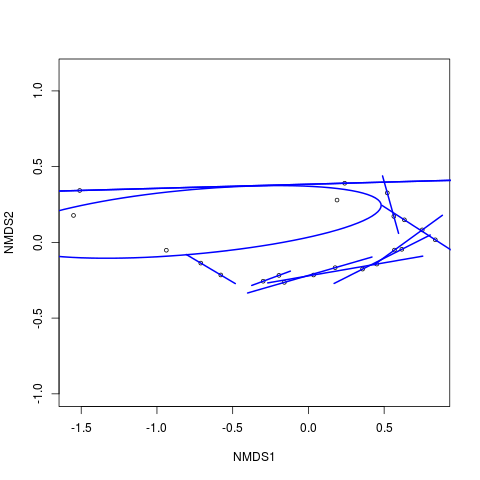

In [52]:
%%R

grps = as.character(rep(seq(1,nrow(ord1$points) / 2), 2))
grps = append(grps, '2')

plot(ord1, type = "p", display='sites')
elps = ordiellipse(ord1, grps, kind="se", conf=0.95, lwd=2, col="blue")

elps = elps %>% summary %>% t %>% as.data.frame
elps

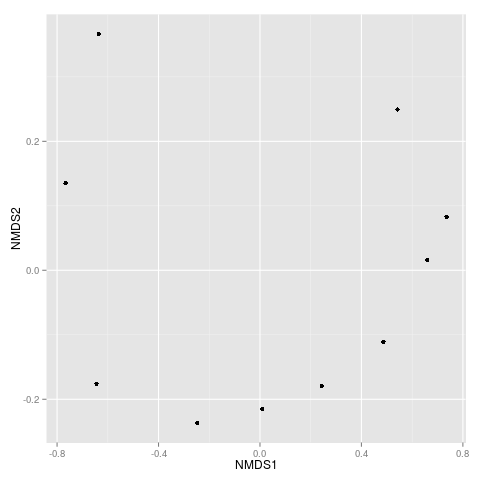

In [53]:
%%R

ggplot(elps, aes(NMDS1, NMDS2)) +
    geom_point()

          NMDS1       NMDS2         Area
1  -0.635357218  0.36677213 0.000000e+00
10  0.542324409  0.24938689          NaN
2  -0.766632793  0.13528520 8.365309e-01
3  -0.644489138 -0.17586293 0.000000e+00
4  -0.246709455 -0.23688196 2.433095e-10
5   0.008901491 -0.21533817 2.163852e-09
6   0.242886943 -0.17908837 1.858819e-09
7   0.487009997 -0.11097516          NaN
8   0.659751477  0.01597090 0.000000e+00
9   0.735630683  0.08308887 0.000000e+00


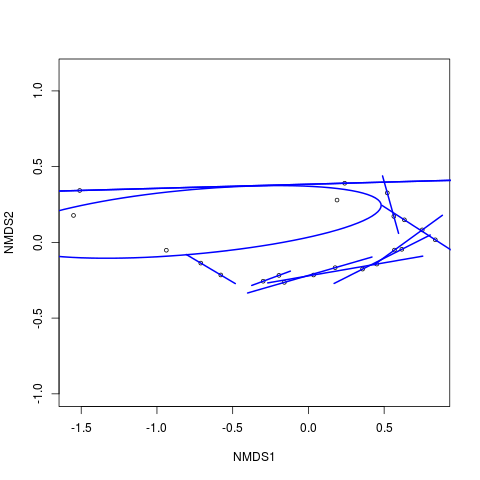

In [64]:
%%R

get.ellipse = function(ord){
    grps = as.character(rep(seq(1,nrow(ord$points) / 2), 2))
    grps = append(grps, '2')
    
    plot(ord, type = "p", display='sites')
    elps = ordiellipse(ord, grps, kind="se", conf=0.95, lwd=2, col="blue")

    elps = elps %>% summary %>% t %>% as.data.frame
    return(elps)
    }


get.ellipse(ord1)

In [114]:
%%R

BD.range = seq(1.6, 1.9, 0.004)

mid = function(x, y){ (x + y)/2 }

get.BD.range = function(tbl, BD.range){
    tbl = as.data.frame(tbl)
    tbl$lib = gsub('__.+', '', rownames(tbl)) %>% as.character
    tbl$BD.start = gsub('.+__([0-9.]+)-.+', '\\1', rownames(tbl)) %>% as.numeric
    tbl$BD.end = gsub('.+-', '', rownames(tbl)) %>% as.numeric
    tbl$BD.mid = mapply(mid, tbl$BD.start, tbl$BD.end)
    tbl$BD.bin = cut(tbl$BD.mid, breaks=BD.range)
    
    tbl = tbl %>%
        unite(group, lib, BD.bin, sep='__')
    
    return(tbl)
    }

ord.BD = get.BD.range(ord1 %>% scores, BD.range=BD.range)
ord.BD %>% head

                    NMDS1      NMDS2            group BD.start BD.end BD.mid
1__1.708-1.712 -1.5101237  0.3428264 1__(1.708,1.712]    1.708  1.712 1.7100
1__1.712-1.717 -0.9379486 -0.0516815 1__(1.712,1.716]    1.712  1.717 1.7145
1__1.717-1.719 -0.5784234 -0.2150748  1__(1.716,1.72]    1.717  1.719 1.7180
1__1.719-1.725 -0.1946565 -0.2175746  1__(1.72,1.724]    1.719  1.725 1.7220
1__1.725-1.729  0.1766000 -0.1668565 1__(1.724,1.728]    1.725  1.729 1.7270
1__1.729-1.732  0.4518703 -0.1430241 1__(1.728,1.732]    1.729  1.732 1.7305


In [106]:
%%R
?tidyr::unite

R Help on ‘unite’unite                  package:tidyr                   R Documentation

_U_n_i_t_e _m_u_l_t_i_p_l_e _c_o_l_u_m_n_s _i_n_t_o _o_n_e.

_D_e_s_c_r_i_p_t_i_o_n:

     Convenience function to paste together multiple functions into
     one.

_U_s_a_g_e:

     unite(data, col, ..., sep = "_", remove = TRUE)
     
_A_r_g_u_m_e_n_t_s:

    data: A data frame.

     col: (Bare) name of column to add

     ...: Specification of columns to unite. Use bare variable names.
          Select all variables between x and z with ‘x:z’, exclude y
          with ‘-y’. For more options, see the select documentation.

     sep: Separator to use between values.

  remove: If ‘TRUE’, remove input columns from output data frame.

_S_e_e _A_l_s_o:

     ‘separate()’, the complement.

_E_x_a_m_p_l_e_s:

     library(dplyr)
     unite_(mtcars, "vs_am", c("vs","am"))
     
     # Separate is the complement of unite
     mtcars %>%


In [103]:
%%R
# making fixed BD-range & binning by BD.mid

BD.range = seq(1.6, 1.9, 0.004)
BD.range

 [1] 1.600 1.604 1.608 1.612 1.616 1.620 1.624 1.628 1.632 1.636 1.640 1.644
[13] 1.648 1.652 1.656 1.660 1.664 1.668 1.672 1.676 1.680 1.684 1.688 1.692
[25] 1.696 1.700 1.704 1.708 1.712 1.716 1.720 1.724 1.728 1.732 1.736 1.740
[37] 1.744 1.748 1.752 1.756 1.760 1.764 1.768 1.772 1.776 1.780 1.784 1.788
[49] 1.792 1.796 1.800 1.804 1.808 1.812 1.816 1.820 1.824 1.828 1.832 1.836
[61] 1.840 1.844 1.848 1.852 1.856 1.860 1.864 1.868 1.872 1.876 1.880 1.884
[73] 1.888 1.892 1.896 1.900


In [104]:
%%R
ord.BD$BD.bin = cut(ord.BD$BD.mid, breaks=BD.range)
ord.BD %>% head

                    NMDS1      NMDS2 lib BD.start BD.end BD.mid        BD.bin
1__1.708-1.712 -1.5101237  0.3428264   1    1.708  1.712 1.7100 (1.708,1.712]
1__1.712-1.717 -0.9379486 -0.0516815   1    1.712  1.717 1.7145 (1.712,1.716]
1__1.717-1.719 -0.5784234 -0.2150748   1    1.717  1.719 1.7180  (1.716,1.72]
1__1.719-1.725 -0.1946565 -0.2175746   1    1.719  1.725 1.7220  (1.72,1.724]
1__1.725-1.729  0.1766000 -0.1668565   1    1.725  1.729 1.7270 (1.724,1.728]
1__1.729-1.732  0.4518703 -0.1430241   1    1.729  1.732 1.7305 (1.728,1.732]
